# The task
Let's imagine that we are an analyst at Kaggle. We've got a request for annual survey EDA:<br>
our task is to get the insights for Educational courses marketing&PR team.

It means we should determine:
- the main audience clusters which we can target on in our marketing and communication campaigns
- clusters, little engaged currently, but potentially big
- trends in libs, models, and other instruments (what do we put in the courses)

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql
import numpy as np

In [8]:
data = pd.read_csv('kaggle_survey_2020_responses.csv')
data


C:\Users\uchih\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20032,126,18-21,Man,Turkey,Some college/university study without earning ...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20033,566,55-59,Woman,United Kingdom of Great Britain and Northern I...,Master’s degree,Currently not employed,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
20034,238,30-34,Man,Brazil,Master’s degree,Research Scientist,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20035,625,22-24,Man,India,Bachelor’s degree,Software Engineer,3-5 years,Python,NaN,SQL,...,Weights & Biases,NaN,NaN,TensorBoard,NaN,NaN,Trains,NaN,NaN,NaN


### Manual feature selecting

In [29]:
questions = pd.read_excel('questions.xlsx', index_col = 0)
questions.iloc[23].Matter="Respondent's role"

questions

,Question,Matter
num,,
1,What is your age (# years)?,Basic easily targeted things that cluster almo...
2,What is your gender? - Selected Choice,Basic easily targeted things that cluster almo...
3,In which country do you currently reside?,Basic easily targeted things that cluster almo...
4,What is the highest level of formal education ...,Q5 is more useful
5,Select the title most similar to your current ...,For whom and about whom to develop the courses
6,For how many years have you been writing code ...,Respondent's level
7,What programming languages do you use on a reg...,What to teach
8,What programming language would you recommend ...,We can compare our insights to direct recommen...
9,Which of the following integrated development ...,What to teach


## 1) Determining the main audience clusters to target on

In [5]:
print('Respondents distribution by age')

data.Q1[1:].value_counts(normalize=True)[:10]

Respondents distribution by age


25-29    0.200190
22-24    0.188960
18-21    0.173138
30-34    0.140297
35-39    0.099371
40-44    0.069724
45-49    0.049311
50-54    0.034837
55-59    0.020513
60-69    0.019864
Name: Q1, dtype: float64

In [6]:
print('Respondents distribution by gender')
data.Q2[1:].value_counts(normalize=True)[:10]

Respondents distribution by gender


Man                        0.788032
Woman                      0.193552
Prefer not to say          0.013126
Prefer to self-describe    0.002695
Nonbinary                  0.002595
Name: Q2, dtype: float64

In [7]:
print('Respondents distribution by country')

data.Q3[1:].value_counts()[:10]

Respondents distribution by country


India                                                   5851
United States of America                                2237
Other                                                   1388
Brazil                                                   694
Japan                                                    638
Russia                                                   582
United Kingdom of Great Britain and Northern Ireland     489
Nigeria                                                  476
China                                                    474
Germany                                                  404
Name: Q3, dtype: int64

In [8]:
print('Respondents distribution by current position')

data.Q5[1:].value_counts(normalize=True)[:10]

Respondents distribution by current position


Student                      0.268247
Data Scientist               0.138818
Software Engineer            0.102091
Other                        0.090107
Currently not employed       0.085698
Data Analyst                 0.076516
Research Scientist           0.060902
Machine Learning Engineer    0.056129
Business Analyst             0.041396
Product/Project Manager      0.035898
Name: Q5, dtype: float64

Respondents distribution by level



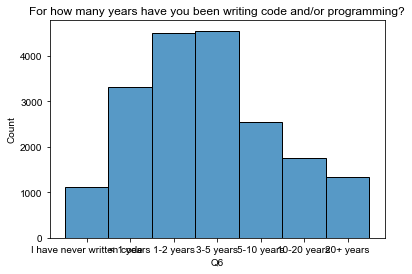

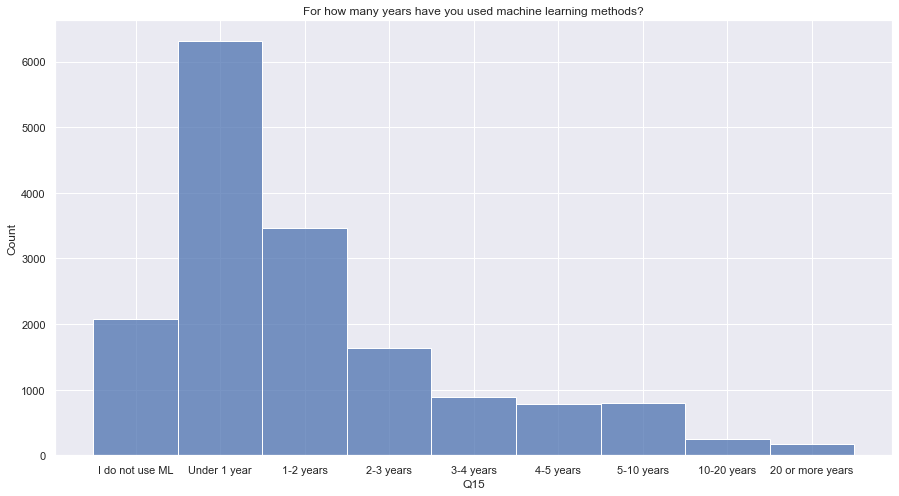

In [9]:
print('Respondents distribution by level\n')

data.Q6 = pd.Categorical(data.Q6, categories=['I have never written code', '< 1 years', '1-2 years', '3-5 years', '5-10 years', '10-20 years', '20+ years'], ordered=True)
sns.histplot(data.Q6[1:].dropna()).set(title='For how many years have you been writing code and/or programming?')
sns.set(rc={'figure.figsize':(15,8)})
plt.show()
plt.clf()

data.Q15 = data.Q15.replace({'I do not use machine learning methods': 'I do not use ML'})
data.Q15 = pd.Categorical(data.Q15, categories=['I do not use ML', 'Under 1 year', '1-2 years', '2-3 years', '3-4 years', '4-5 years', '5-10 years', '10-20 years', '20 or more years'], ordered=True)
sns.histplot(data.Q15[1:].dropna()).set(title='For how many years have you used machine learning methods?')
sns.set(rc={'figure.figsize':(15,8)})
plt.show()

In [3]:
age_vs_gender = data.Q2[1:].groupby(data.Q1[1:]).value_counts(normalize=True)
age_vs_gender

Q1     Q2                     
18-21  Man                        0.752666
       Woman                      0.229461
       Prefer not to say          0.012107
       Prefer to self-describe    0.003459
       Nonbinary                  0.002306
22-24  Man                        0.749604
       Woman                      0.234020
       Prefer not to say          0.010829
       Nonbinary                  0.003170
       Prefer to self-describe    0.002377
25-29  Man                        0.779855
       Woman                      0.204188
       Prefer not to say          0.010471
       Nonbinary                  0.003241
       Prefer to self-describe    0.002244
30-34  Man                        0.799004
       Woman                      0.179296
       Prefer not to say          0.015653
       Prefer to self-describe    0.003202
       Nonbinary                  0.002846
35-39  Man                        0.794073
       Woman                      0.184832
       Prefer not to sa

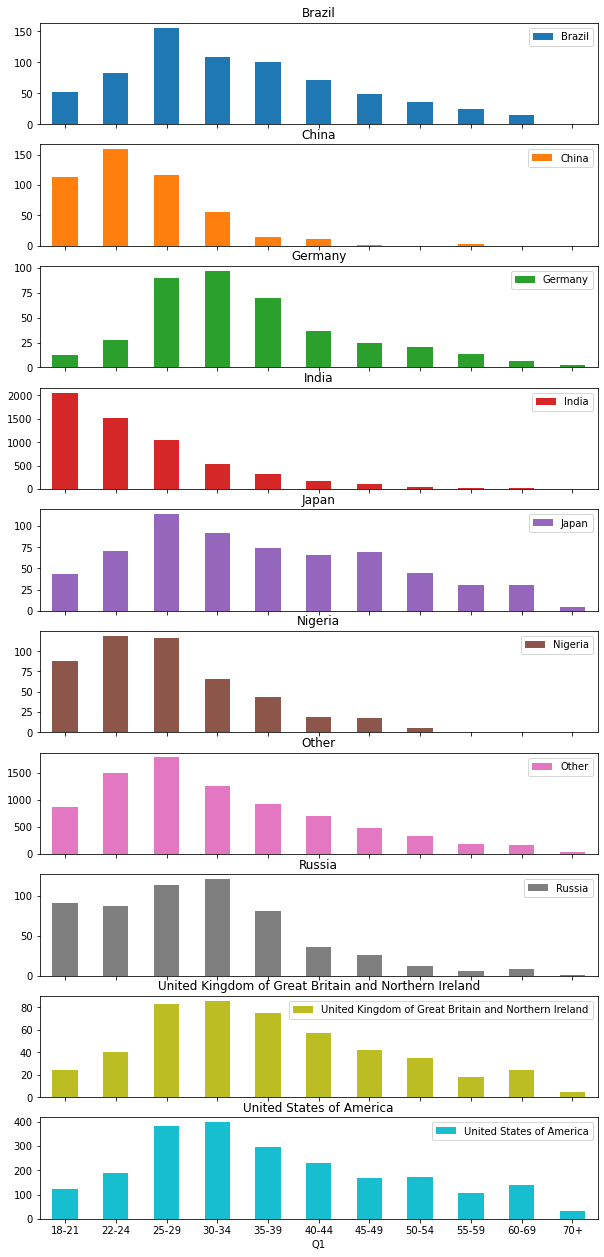

In [7]:
top_countries = data.Q3[1:].value_counts()[:10]
data.Q3[1:] = data.Q3[1:].apply(lambda x: 'Other' if x not in top_countries.index else x)

country_vs_age = data.Q1[1:].groupby(data.Q3[1:]).value_counts()

country_vs_age.unstack(level=0).plot(kind='bar', subplots=True, rot=0, figsize=(10, 22))
plt.show()

C:\Users\uchih\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1583: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


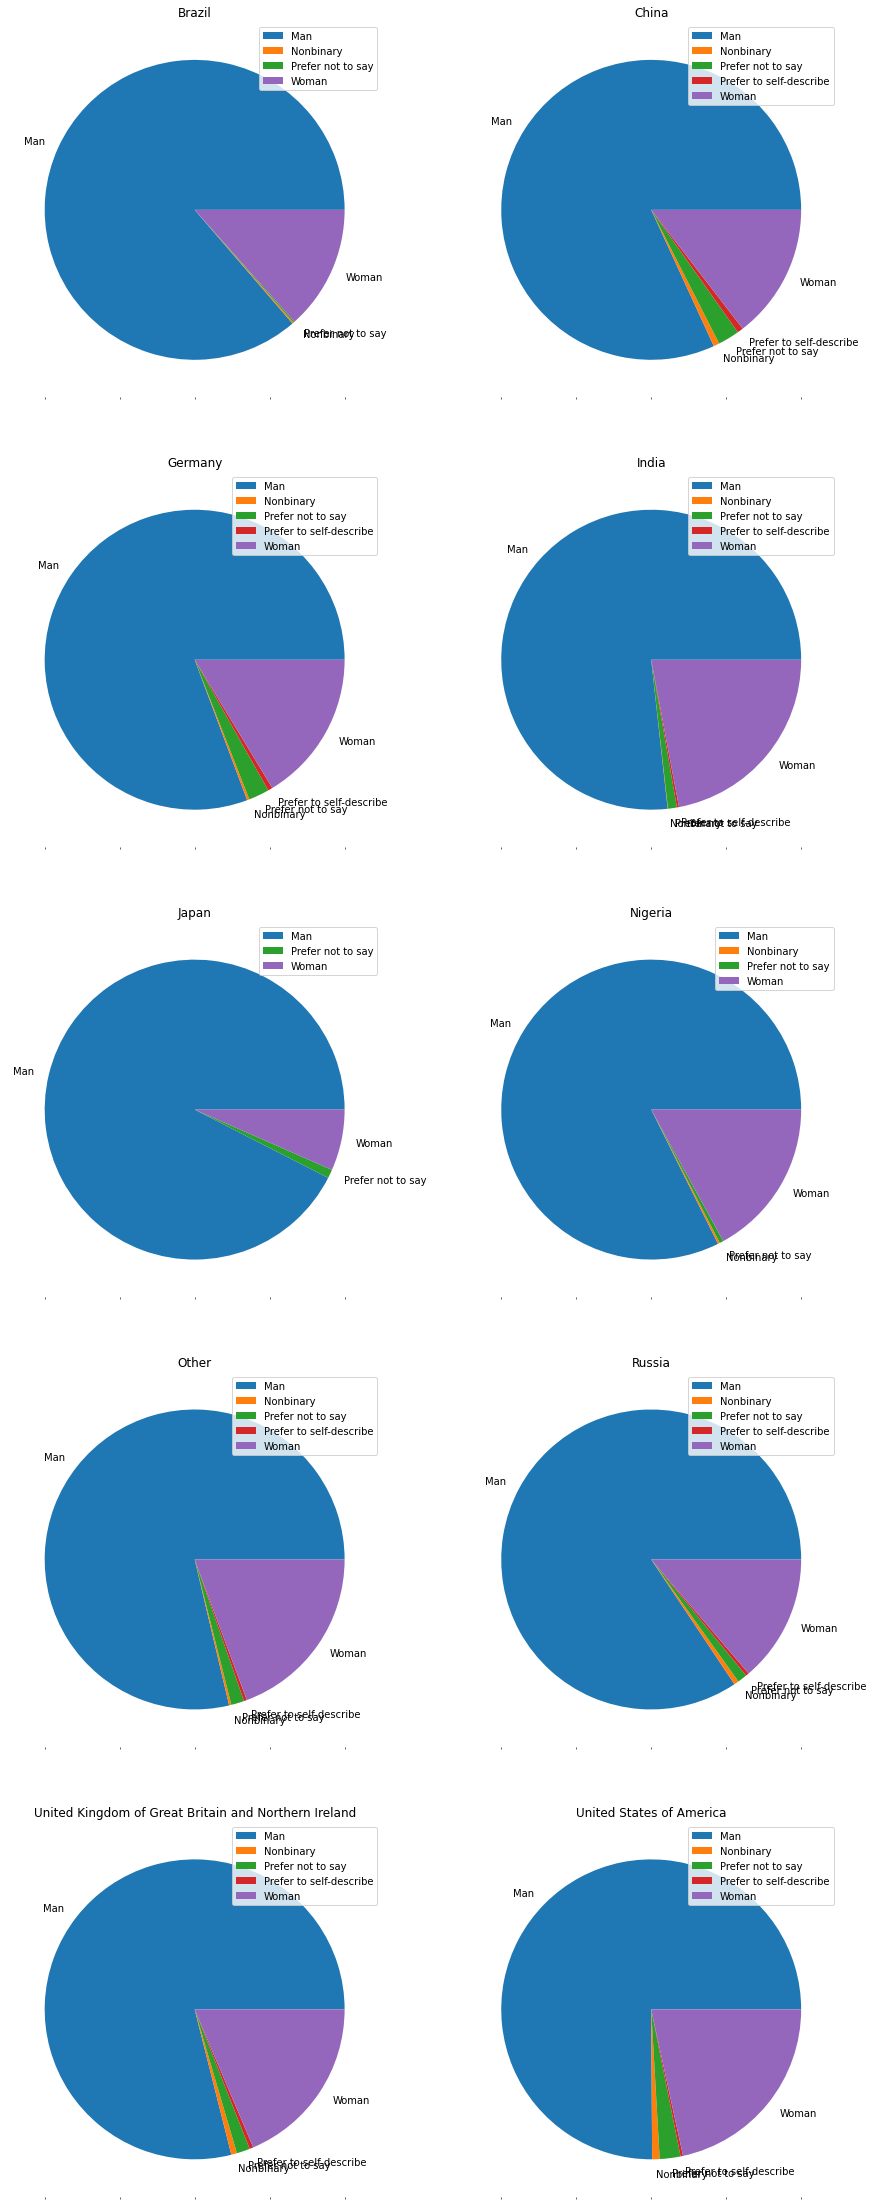

In [25]:
country_vs_gender = data.Q2[1:].groupby(data.Q3[1:]).value_counts(normalize=True)

country_vs_gender=country_vs_gender.unstack(level=0).plot(kind='pie', subplots=True, figsize=(15, 40),layout=(5,2), title=sorted(list(data.Q3[1:].unique())), ylabel='')
plt.show()

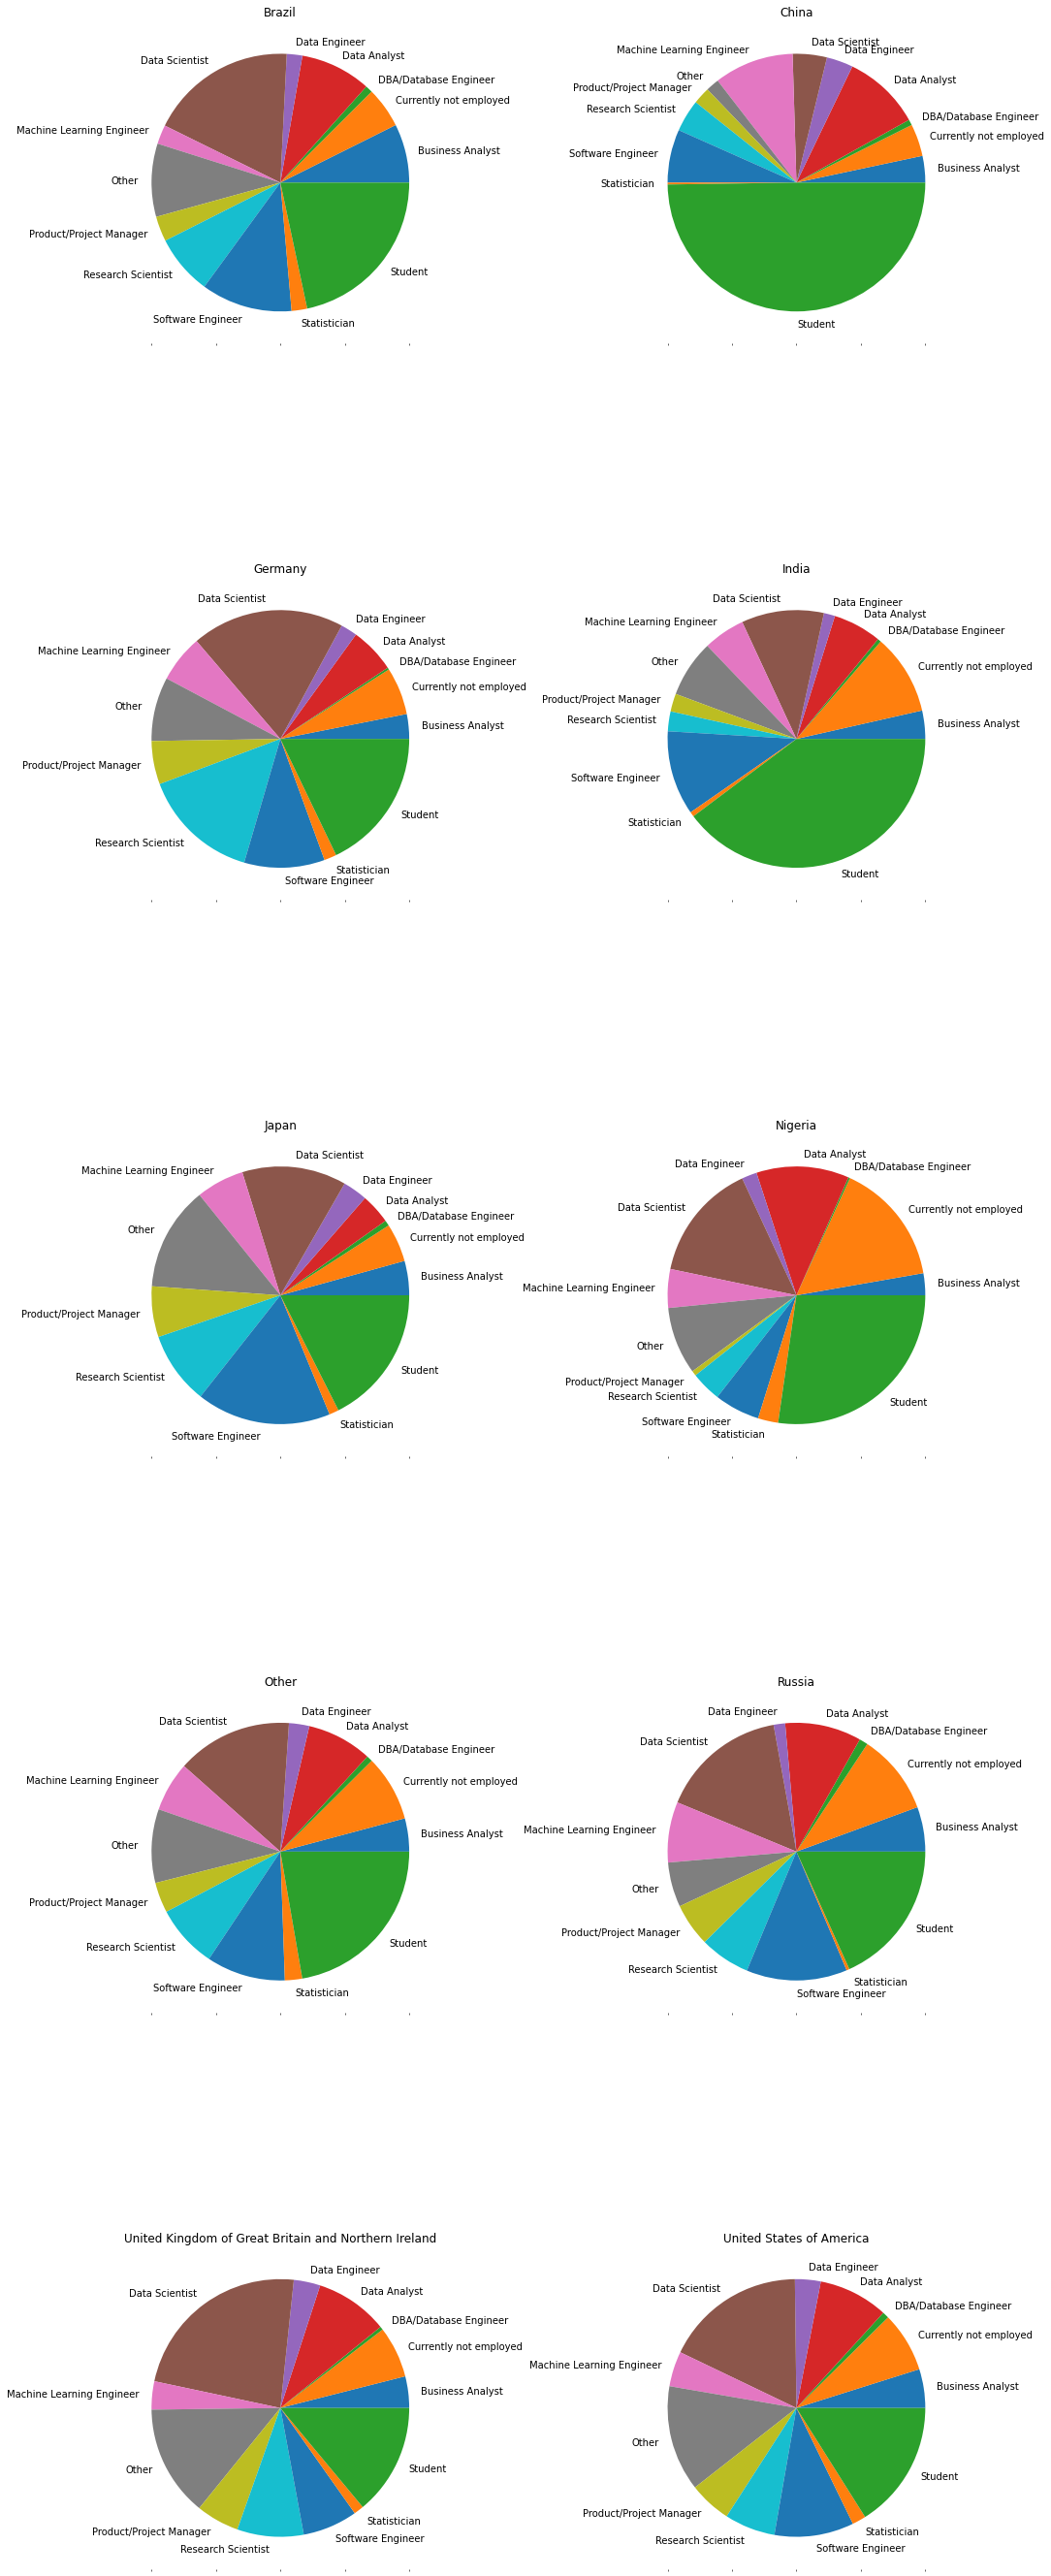

In [28]:
country_vs_position = data.Q5[1:].groupby(data.Q3[1:]).value_counts()

country_vs_position.unstack(level=0).plot(kind='pie', subplots=True, figsize=(15, 40),layout=(5,2), legend=0, title=sorted(list(data.Q3[1:].unique())), ylabel='')
plt.tight_layout()
plt.show()

## 2) Courses content

In [12]:
def get_position_vs_instrument_heatmaps(inst_ids):
    data = pd.read_csv('kaggle_survey_2020_responses.csv')

    indexes1=list(pd.unique((data.iloc[1:,inst_ids]).values.ravel('K')))
    indexes1=[x for x in indexes1 if str(x) != 'nan']

    columns1=list(pd.unique((data.iloc[1:,5]).values.ravel('K')))
    columns1=[x for x in columns1 if str(x) != 'nan']

    listed_col1 = list(data.columns)    
    listed_col1[inst_ids] = indexes1
    data.columns=listed_col1    
    
    df1=pd.DataFrame(columns=columns1, index=indexes1)
    
    sub_df1=pd.DataFrame(columns=indexes1)

    sub_df1['Pos']=data.iloc[:,5].copy()
    for col in indexes1:
        sub_df1[col][1:] = data[col][1:].apply(lambda x: 1 if type(x) == str else 0)

    for column in df1.columns:
        for lang in df1.index:
            df1[column][lang]=sub_df1[lang][1:][sub_df1['Pos']==column].sum()/len(sub_df1[sub_df1['Pos']==column])

    df1=df1.apply(pd.to_numeric)
    
    sns.heatmap(df1)
    plt.show()
    plt.clf()
    
    indexes2=list(pd.unique((data.iloc[1:,inst_ids]).values.ravel('K')))
    indexes2=[x for x in indexes2 if str(x) != 'nan']

    df2=pd.DataFrame(columns=pd.unique((data.iloc[1:,110:118]).values.ravel('K'))[1:],
                     index=indexes2)
    
    sub_df2=pd.Series(data.iloc[:,inst_ids].values.tolist())
    sub_df2=pd.DataFrame(sub_df2)
    sub_df2['Role']=data.iloc[:,110:118].values.tolist()
    for column in range(len(df2.columns)):
        for lang in df2.index:
            i=0
            for row in range(len(data)):
                if df2.columns[column] in sub_df2['Role'][row] and lang in sub_df2.iloc[:,0][row]:
                    i+=1
            df2[df2.columns[column]][lang] = i/data.iloc[1:,110+column].count()

    df2=df2.apply(pd.to_numeric)
    
    sns.heatmap(df2)
    plt.show()

C:\Users\uchih\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3357: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


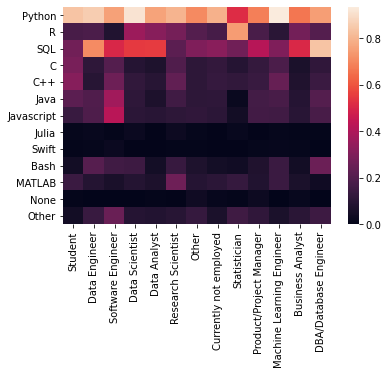

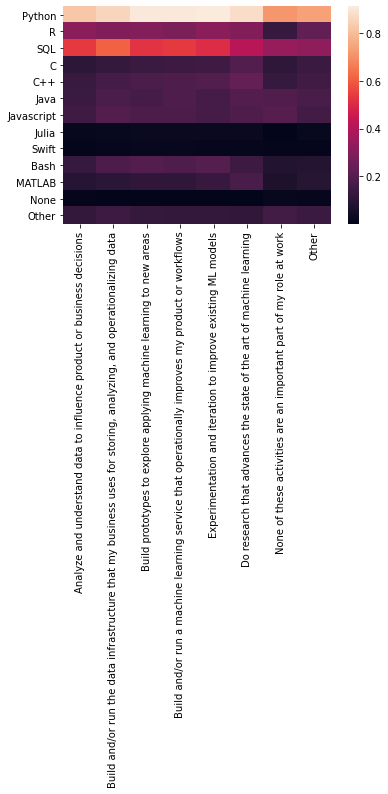

In [13]:
get_position_vs_instrument_heatmaps(slice(7,20))

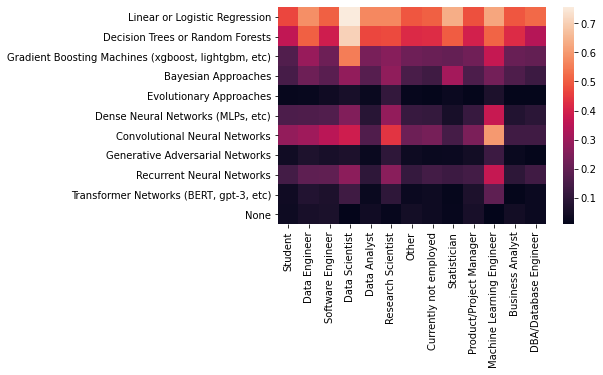

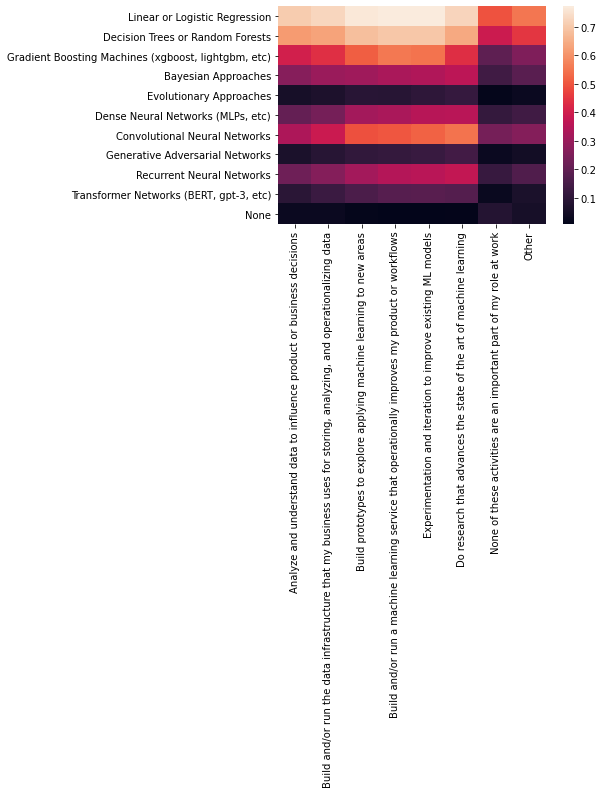

In [14]:
get_position_vs_instrument_heatmaps(inst_ids=slice(82,93))

In [43]:
#data.columns.get_loc('Q28_A_Part_1')

questions[questions['Matter']=='What to teach']

,Question,Matter
num,,
7,What programming languages do you use on a reg...,What to teach
9,Which of the following integrated development ...,What to teach
10,Which of the following hosted notebook product...,What to teach
11,What type of computing platform do you use mos...,What to teach
12,Which types of specialized hardware do you use...,What to teach
13,Approximately how many times have you used a T...,What to teach
14,What data visualization libraries or tools do ...,What to teach
16,Which of the following machine learning framew...,What to teach
17,Which of the following ML algorithms do you us...,What to teach
